In [6]:
from assistance.data import get_clean_network_data, pd

In [3]:
df = get_clean_network_data()

<font color="green">[17:19:33] **11359 rows imported.**</font>

<font color="green">[17:19:33] **9321 rows after filtering**: Required data.</font>

<font color="green">[17:19:33] **9260 rows after filtering**: Exclusion from visulization.</font>

<font color="green">[17:19:33] **8537 rows after filtering**: Unsure whether drag artist.</font>

<font color="green">[17:19:33] **8505 rows after filtering**: Full date in `Date` column.</font>

<font color="green">[17:19:34] **Cleaned up all names**.</font>

<font color="green">[17:19:34] **Fixed columns**: Renamed some columns and removed all unneccesary columns.</font>

<font color="green">[17:19:34] **Index has been reset**.</font>

In [122]:
def count_performer(name):
    ''' Provides the R value for each of the nodes, which means the number of unique dates in which they appear in the dataset. '''
    return len(set(x for x in filtered_df[filtered_df['Performer']==name]['Date']))


solo_performers = []
group_performers = []

for groups, rows in filtered_df.groupby(['Venue', 'Date']):
    venue, date = groups
    solo = len(set(x for x in rows.Performer)) == 1
    if solo:
        solo_performers.append([x for x in rows.Performer][0])
    else:
        for performer in rows.Performer:
            group_performers.append(performer)

from collections import Counter
solo_performer_count = Counter()
for performer in set(solo_performers).difference(set(group_performers)):
    solo_performer_count[performer] = count_performer(performer)
    
group_performer_count = Counter()
for performer in set(group_performers).difference(set(solo_performers)):
    group_performer_count[performer] = count_performer(performer)
    
union_performer_count = Counter()
for performer in set(group_performers).intersection(set(solo_performers)):
    union_performer_count[performer] = count_performer(performer)

In [123]:
data = []

for performer, count in solo_performer_count.items():
    data.append({
        "group": "S",
        "name": performer,
        "r": count
    })
    
for performer, count in group_performer_count.items():
    data.append({
        "group": "G",
        "name": performer,
        "r": count
    })
    
for performer, count in union_performer_count.items():
    data.append({
        "group": "U",
        "name": performer,
        "r": count
    })
    

In [124]:
import json
from pathlib import Path

In [125]:
# This should be put into the `clustering-v-individual.json` file.
print(json.dumps(data))

[{"group": "S", "name": "Unnamed performer from Dante's Inferno", "r": 1}, {"group": "S", "name": "Clarenz Henderson", "r": 5}, {"group": "S", "name": "Olyn Landick", "r": 7}, {"group": "S", "name": "Bertie Bierman", "r": 2}, {"group": "S", "name": "Jean Barrios", "r": 11}, {"group": "S", "name": "Chick Chandler", "r": 1}, {"group": "S", "name": "Bill Jones", "r": 1}, {"group": "S", "name": "Brennan", "r": 1}, {"group": "S", "name": "Unnamed performer from Earle", "r": 1}, {"group": "S", "name": "Red Evans", "r": 1}, {"group": "S", "name": "Henri St. Charles", "r": 2}, {"group": "S", "name": "Joe Lewis", "r": 1}, {"group": "S", "name": "Teddy", "r": 2}, {"group": "S", "name": "Manhattan Pearl", "r": 6}, {"group": "S", "name": "Vincent Reid", "r": 1}, {"group": "S", "name": "Joe Canary", "r": 2}, {"group": "S", "name": "Bobby Grant", "r": 1}, {"group": "S", "name": "Mickey Strauss", "r": 5}, {"group": "S", "name": "Tess Russell", "r": 1}, {"group": "S", "name": "Wallace Reed", "r": 1}, 

In [117]:
# Counting distribution of years, months, and days

df['Year'] = df.apply(lambda row: pd.to_datetime(row.Date).year, axis=1)
df['Month'] = df.apply(lambda row: pd.to_datetime(row.Date).month, axis=1)
df['Day'] = df.apply(lambda row: pd.to_datetime(row.Date).day, axis=1)

filtered_df = df[(df['Year'] > 1929) & (df['Year'] < 1940)]
filtered_df

year_counts = filtered_df['Year'].sort_values().value_counts()
month_counts = filtered_df['Month'].sort_values().value_counts()
day_counts = filtered_df['Day'].sort_values().value_counts()

<AxesSubplot:>

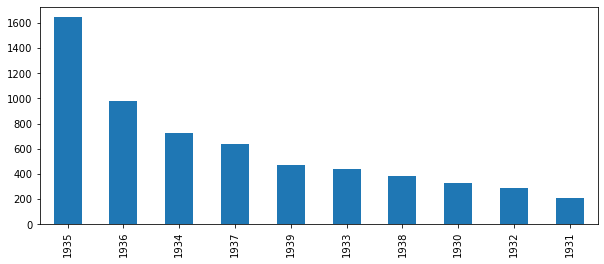

In [119]:
year_counts.plot.bar(figsize=(10, 4))

<AxesSubplot:>

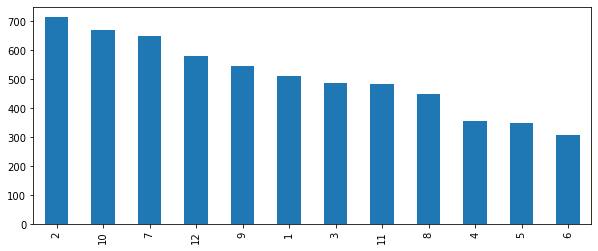

In [120]:
month_counts.plot.bar(figsize=(10, 4))

<AxesSubplot:>

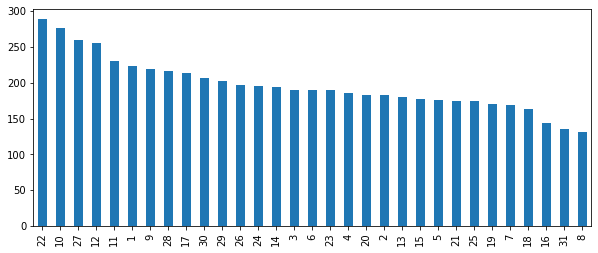

In [121]:
day_counts.plot.bar(figsize=(10, 4))